# Visualização de dados com Python
## 2 - Visualizações com mais de 2 dimensões
*Cleuton Sampaio*, [**DataLearningHub**](http://datalearninghub.com)
Nesta lição veremos como fornecer visualizações com mais de duas dimensões de dados. 

[![](../banner_livros2.png)](https://www.lcm.com.br/site/#livros/busca?term=cleuton)

## Dispersão tridimensional
Em casos que temos três características mensuráveis e, principalmente, plotáveis (dentro da mesma escala - ou podemos ajustar a escala), é interessante ver um gráfico de dispersão para podermos avaliar visualmente a distribuição das amostras. É o que veremos com a bilbioteca Matplotlib Toolkits, em especial a MPlot3D, que tem o objeto Axes3D para geração de gráficos tridimensionais.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D # Objetos que usaremos em nosso gráfico
%matplotlib inline
df = pd.read_csv('../datasets/evasao.csv') # Dados de evasão escolar que coletei
df.head()

,periodo,bolsa,repetiu,ematraso,disciplinas,faltas,desempenho,abandonou
0,2,0.25,8,1,4,0,0.000000,1
1,2,0.15,3,1,3,6,5.333333,0
2,4,0.10,0,1,1,0,8.000000,0
3,4,0.20,8,1,1,0,4.000000,1
4,1,0.20,3,1,1,1,8.000000,0


Algumas explicações. Para começar, vejamos as colunas deste dataset: 
- "periodo": Período em que o aluno está;
- "bolsa": Percentual de bolsa que o aluno recebe;
- "repetiu": Quantidade de disciplinas nas quais o aluno foi reprovado;
- "ematraso": Se o aluno está com mensalidades em atraso;
- "disciplinas": Disciplinas que o aluno está cursando atualmente;
- "desempenho": Média acadêmica até agora;
- "abandonou": Se o aluno abandonou o curso depois da medição ou não.

Para podermos plotar um gráfico, precisamos reduzir a quantidade de dimensões, ou seja, as características. Farei isso da maneira mais "naive" possível, selecionando três características que mais influenciaram no resultado final, ou seja o abandono do aluno (Churn).

In [3]:
df2 = df[['periodo','repetiu','desempenho']][df.abandonou == 1]
df2.head()

,periodo,repetiu,desempenho
0,2,8,0.0
3,4,8,4.0
5,5,2,3.5
7,2,3,4.5
14,3,4,2.5


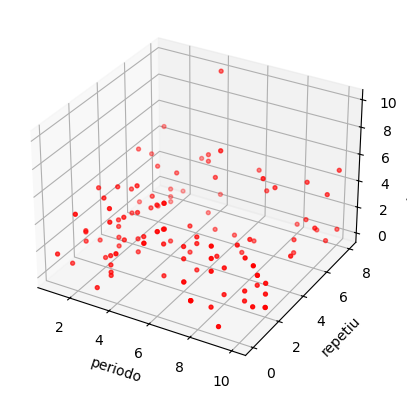

In [4]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax = Axes3D(fig) # Para Matplotlib  0.99
ax = fig.add_subplot(projection='3d')
ax.scatter(xs=df2['periodo'],ys=df2['repetiu'],zs=df2['desempenho'], c='r',s=8)
ax.set_xlabel('periodo')
ax.set_ylabel('repetiu')
ax.set_zlabel('desempenho')
plt.show()

Simplesmente usei o Axes3D para obter um objeto gráfico tridimensional. O método "scatter" recebe três dimensões (xs, ys e zs), cada uma atribuída a uma das colunas do novo dataframe. O parâmetro "c" é a cor e o "s" é o tamanho de cada ponto. Informei os rótulos de cada eixo e pronto! Temos um gráfico 3D mostrando a distribuição espacial dos abandonos de curso, com relação às três variáveis. 

Podemos avaliar muito melhor a tendência de dados, se olharmos em visualizações 3D. Vejamos um exemplo sintético. Vamos gerar alguns valores 3D:

In [5]:
import numpy as np
np.random.seed(42)
X = np.linspace(1.5,3.0,num=100)
Y = np.array([x**4 + (np.random.rand()*6.5) for x in X])
Z = np.array([(X[i]*Y[i]) + (np.random.rand()*3.2) for i in range(0,100)])

Primeiramente veremos como ficaria isso em visualização 2D:

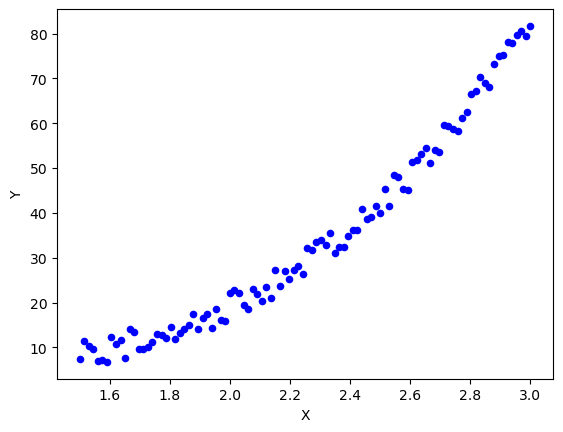

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X, Y, c='b', s=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

Ok... Nada demais... Uma correlação não linear positiva, certo? Mas agora, vejamos isso com a matriz Z incluída: 

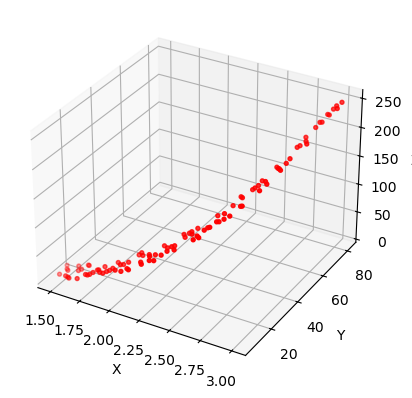

In [7]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c='r',s=8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

E isso fica mais interessante quando sobrepomos uma predição sobre os dados reais. Vamos usar um Decision Tree Regressor para criar um modelo preditivo para estes dados:

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
features = pd.DataFrame({'X':X, 'Z':Z})
labels = pd.DataFrame({'Y':Y})
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)
dtr3d = DecisionTreeRegressor(max_depth=4, random_state=42)
dtr3d.fit(X_train,y_train)

print('R2',dtr3d.score(X_train,y_train))

R2 0.9976832045216717


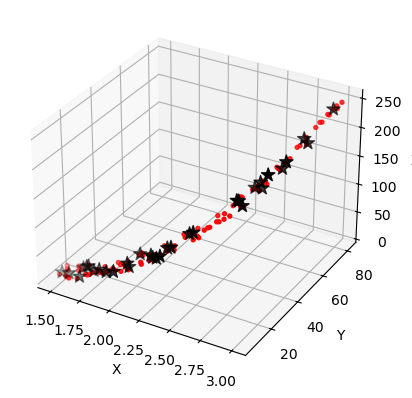

In [9]:
yhat3d = dtr3d.predict(X_test)

fig = plt.figure()
ax = ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='r',s=8)
ax.scatter(X_test['X'], yhat3d, X_test['Z'], c='k', marker='*',s=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Plotamos as predições usando marker do tipo estrela. Ficou bem interessante, não?

## Mais de 3 dimensões

As vezes queremos demonstrar informações com mais de 3 dimensões, mas como fazer isso? Vamos supor que queiramos também incluir o percentual de bolsa como uma variável em nosso exemplo de evasão escolar. Como faríamos?
Uma abordagem possível seria manipular os markers para que representem a bolsa. Podemos usar cores, por exemplo. Vejamos, primeiramente, precisamos saber quais faixas de bolsa existem no dataset: 


In [10]:
print(df.groupby("bolsa").count())

       periodo  repetiu  ematraso  disciplinas  faltas  desempenho  abandonou
bolsa                                                                        
0.00        53       53        53           53      53          53         53
0.05        50       50        50           50      50          50         50
0.10        50       50        50           50      50          50         50
0.15        50       50        50           50      50          50         50
0.20        45       45        45           45      45          45         45
0.25        52       52        52           52      52          52         52


Podemos criar uma tabela de cores, indexada pelo percentual de bolsa:

In [11]:
from decimal import Decimal
bolsas = {0.00: 'k',0.05: 'r', 0.10: 'g', 0.15: 'm', 0.20: 'y', 0.25: 'b'}
df['cor'] = [bolsas[float(round(Decimal(codigo),2))] for codigo in df['bolsa']]
df.head()

,periodo,bolsa,repetiu,ematraso,disciplinas,faltas,desempenho,abandonou,cor
0,2,0.25,8,1,4,0,0.000000,1,b
1,2,0.15,3,1,3,6,5.333333,0,m
2,4,0.10,0,1,1,0,8.000000,0,g
3,4,0.20,8,1,1,0,4.000000,1,y
4,1,0.20,3,1,1,1,8.000000,0,y


Essa "maracutaia" merece uma explicação. Criei um dicionário indexado pelo valor da bolsa. Assim, pegamos o código da cor correspondente. Só que preciso incluir uma coluna no dataframe com esse valor, de modo a usar no gráfico. Só tem um problema: O dataset original está "sujo" (algo que acontece frequentemente) e o percentual 0.15 está como 0.1500000002. Posso retirar isso convertendo o falor de "float" para "Decimal", arredondanto e convertendo novamente em float. 

Quando plotarmos, vamos procurar a cor no dicionário: 

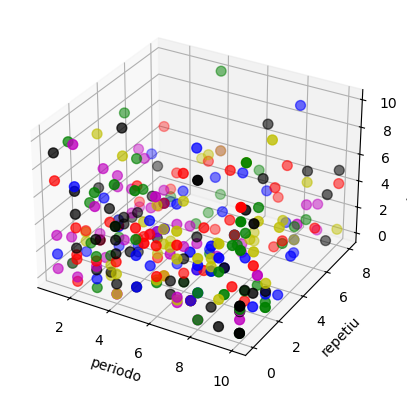

In [12]:
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(projection='3d') # Para Matplotlib  0.99
ax.scatter(xs=df['periodo'],ys=df['repetiu'],zs=df['desempenho'], c=df['cor'],s=50)
ax.set_xlabel('periodo')
ax.set_ylabel('repetiu')
ax.set_zlabel('desempenho')
plt.show()

Pronto! Temos ai a cor da bola dando a quarta dimensão: O percentual de bolsa

Vemos que já uma concentração de alunos com bolsa de 25% (cor azul) com poucas repetições, mas baixo desempenho, em todos os períodos. 

Assim como mexemos com a cor, podemos mexer com o tamanho, criando algo como um "mapa de calor". Vamos transformar essa visão em 2D, colocando o "desempenho" com tamanho diferenciado.

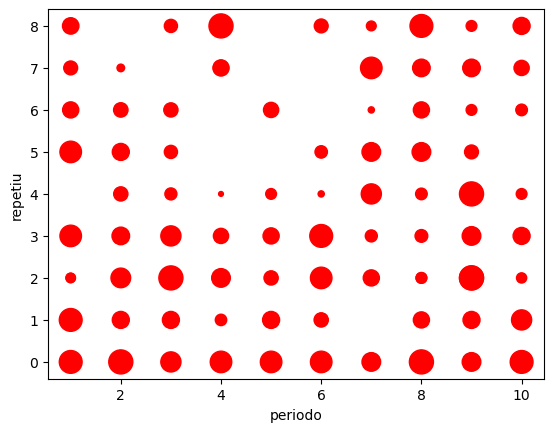

In [12]:
fig, ax = plt.subplots()
ax.scatter(df['periodo'],df['repetiu'], c='r',s=df['desempenho']*30)
ax.set_xlabel('periodo')
ax.set_ylabel('repetiu')
plt.show()

Isso nos mostra um fato curioso. Temos alunos com bom desempenho (bolas grandes) em todos os períodos, sem repetir nenhuma disciplina, que abandonaram. O que os teria feito fazer isto? Talvez sejam condições financeiras, ou insatisfação com o curso. Um fato a ser investigado, que só foi revelado graças a esta visualização.

## Georreferenciamento
Muitas vezes temos datasets com informações geográficas e precisamos plotar os dados sobre um mapa. Vou mostrar aqui como fazer isso com um exemplo do dataset dos casos de Dengue de 2018 no Rio de Janeiro. Fonte: Data Rio: http://www.data.rio/datasets/fb9ede8d588f45b48b985e62c817f062_0

Eu criei um dataset georreferenciado, que está na pasta desta demonstração. Ele está em formato CSV, separado por ponto e vírgula, com separador decimal em português (vírgula): 

In [13]:
df_dengue = pd.read_csv('./dengue2018.csv',decimal=',', sep=';')
df_dengue.head()

,bairro,quantidade,latitude,longitude
0,Saúde,0,-22.897827,-43.197170
1,Gamboa,8,-22.900655,-43.206874
2,Santo Cristo,13,-22.876059,-43.234724
3,Caju,42,-22.900546,-43.186895
4,Centro,54,-22.919694,-43.202204


Um simples gráfico de dispersão já dá uma boa noção do problema: 

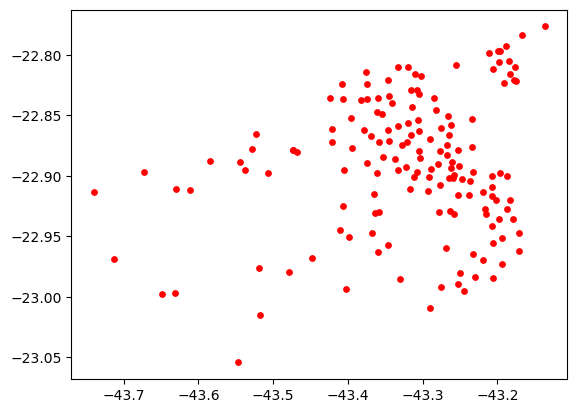

In [14]:
fig, ax = plt.subplots()
ax.scatter(df_dengue['longitude'],df_dengue['latitude'], c='r',s=15)
plt.show()

Podemos colocar o tamanho do ponto proporcional à quantidade de casos, aumentando a dimensão das informações: 

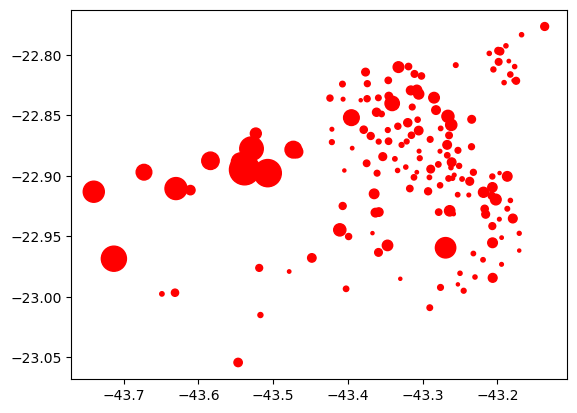

In [15]:
fig, ax = plt.subplots()
ax.scatter(df_dengue['longitude'],df_dengue['latitude'], c='r',s=5+df_dengue['quantidade'])
plt.show()

Podemos manipular a cor e intensidade para criar um "mapa de calor" da Dengue:

In [16]:
def calcular_cor(valor):
    cor = 'r'
    if valor <= 10: 
        cor = '#ffff00'
    elif valor <= 30:
        cor = '#ffbf00'
    elif valor <= 50:
        cor = '#ff8000'
    return cor
                
df_dengue['cor'] = [calcular_cor(codigo) for codigo in df_dengue['quantidade']]

In [17]:
df_dengue.head()

,bairro,quantidade,latitude,longitude,cor
0,Saúde,0,-22.897827,-43.197170,#ffff00
1,Gamboa,8,-22.900655,-43.206874,#ffff00
2,Santo Cristo,13,-22.876059,-43.234724,#ffbf00
3,Caju,42,-22.900546,-43.186895,#ff8000
4,Centro,54,-22.919694,-43.202204,r


E vamos ordenar para que as maiores quantidades fiquem por último: 

In [18]:
dfs = df_dengue.sort_values(['quantidade'])
dfs.head()

,bairro,quantidade,latitude,longitude,cor
0,Saúde,0,-22.897827,-43.197170,#ffff00
101,Cidade Universitária,0,-22.837634,-43.382897,#ffff00
30,São Conrado,0,-22.989818,-43.252920,#ffff00
21,Urca,0,-22.961871,-43.170891,#ffff00
128,Joá,0,-22.985191,-43.329977,#ffff00


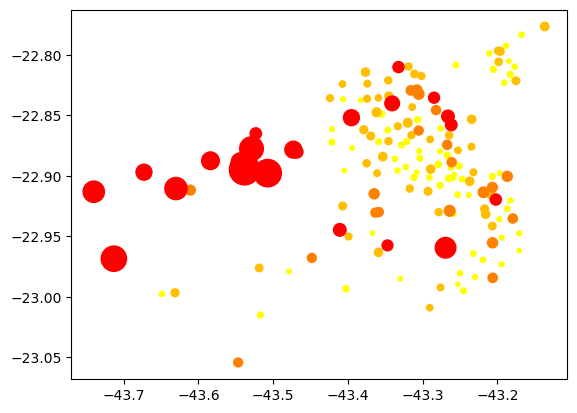

In [19]:
fig, ax = plt.subplots()
ax.scatter(dfs['longitude'],dfs['latitude'], c=dfs['cor'],s=10+dfs['quantidade'])
plt.show()

Pronto! Um mapa de calor da Dengue em 2018. Mas está faltando algo certo? Cadê o mapa do Rio de Janeiro?
Muita gente usa o **geopandas** e baixa arquivos de mapas. Eu prefiro usar o Google Maps. Ele tem uma API chamada Static Maps que permite baixar mapas. Primeiramente, vou instalar o **requests**: 

In [20]:
!pip install requests

Agora, vem uma parte um pouco mais "esperta". Eu tenho as coordenadas do centro do Rio de Janeiro (centro geográfico, não o centro da cidade). Vou montar um request à API Static Map para baixar um mapa. Veja bem, você tem que cadastrar uma API Key para usar esta API. Eu omiti a minha propositalmente. Aqui você tem as instruções para isto: https://developers.google.com/maps/documentation/maps-static/get-api-key

In [21]:
import requests
latitude  = -22.9137528
longitude = -43.526409
zoom = 10
size = 800
scale = 1
apikey = "** COLE SUA API KEY **"
gmapas = "https://maps.googleapis.com/maps/api/staticmap?center=" + str(latitude) + "," + str(longitude) + \
    "&zoom=" + str(zoom) + \
    "&scale=" + str(scale) + \
    "&size=" + str(size) + "x" + str(size) + "&key=" + apikey
with open('mapa.jpg', 'wb') as handle:
        response = requests.get(gmapas, stream=True)

        if not response.ok:
            print(response)

        for block in response.iter_content(1024):
            if not block:
                break

            handle.write(block)


![](./mapa.jpg)

Bom, o mapa foi salvo, agora eu preciso saber as coordenadas dos limites. A API do Google só permite que você informe o centro (latitude e longitude) e as dimensões da imagem em pixels. Mas, para ajustar o mapa às coordenadas em latitudes e longitudes, é preciso saber as coordenadas do retângulo da imagem. 
Há vários exemplos de como calcular isso e eu uso um exemplo Javascript que converti para Python há algum tempo. 
Este cálculo é baseado no script de: https://jsfiddle.net/1wy1mm7L/6/

In [22]:
import math
_C = { 'x': 128, 'y': 128 };
_J = 256 / 360;
_L = 256 / (2 * math.pi);

def tb(a):
    return 180 * a / math.pi


def sb(a):
    return a * math.pi / 180

def bounds(a, b, c):
    if b != None: 
        a = max(a,b)
    if c != None: 
        a = min(a,c)
    return a

def latlonToPt(ll):
    a = bounds(math.sin(sb(ll[0])), -(1 - 1E-15), 1 - 1E-15);
    return {'x': _C['x'] + ll[1] * _J,'y': _C['y'] + 0.5 * math.log((1 + a) / (1 - a)) * - _L}

def ptToLatlon(pt):
    return [tb(2 * math.atan(math.exp((pt['y'] - _C['y']) / -_L)) - math.pi / 2),(pt['x'] - _C['x']) / _J]

def calculateBbox(ll, zoom, sizeX, sizeY, scale):
    cp = latlonToPt(ll)
    pixelSize = math.pow(2, -(zoom + 1));
    pwX = sizeX*pixelSize;
    pwY = sizeY*pixelSize;
    return {'ne': ptToLatlon({'x': cp['x'] + pwX, 'y': cp['y'] - pwY}),'sw': ptToLatlon({'x': cp['x'] - pwX, 'y': cp['y'] + pwY})}

limites = calculateBbox([latitude,longitude],zoom, size, size, scale)
print(limites)


{'ne': [-22.406842952305475, -42.97709259375], 'sw': [-23.418774019100944, -44.07572540625]}


A função "calculateBbox" retorna um dicionário contendo os pontos Nordeste e Sudoeste, com a latitude e longitude de cada um. 
Para usar isso no matplotlib, eu preciso usar o método **imshow**, só que eu preciso informar a escala, ou seja, qual é o intervalo de latitudes (vertical) e longitudes (horizontal) que o mapa representa. Assim, a plotagem de pontos ficará correta. 
Eu vou usar a biblioteca **mpimg** para ler o arquivo de imagem que acabei de baixar. 
Só que a função **imshow** usa as coordenadas no atributo **extent** na ordem: ESQUERDA, DIREITA, BAIXO, TOPO. Temos que organizar a passagem dos parâmetros para ela. 

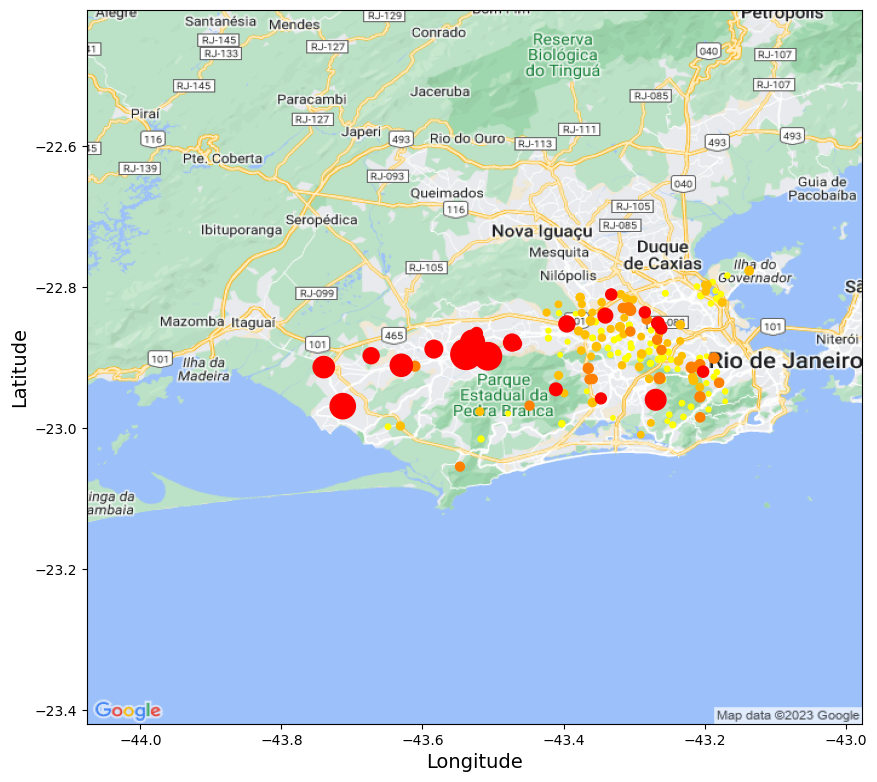

In [23]:
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(10, 10))
rio_mapa=mpimg.imread('./mapa.jpg')
plt.imshow(rio_mapa, extent=[limites['sw'][1],limites['ne'][1],limites['sw'][0],limites['ne'][0]], alpha=1.0)
ax.scatter(dfs['longitude'],dfs['latitude'], c=dfs['cor'],s=10+dfs['quantidade'])
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

Pronto! Ai está! Um mapa de calor georreferenciado da Dengue em 2018 no Rio de Janeiro